In [38]:
import zarr
import zarr.storage
import s3fs
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_1d_profiles(profiles: xr.Dataset):
    """Helper function for plotting 1D profiles"""
    n = int(np.ceil(len(profiles.data_vars) / 2))
    fig, axes = plt.subplots(n, 2, figsize=(10, 2*n))
    axes = axes.flatten()

    for i, name in enumerate(profiles.data_vars.keys()):
        profiles[name].plot(x='time', ax=axes[i])

    for ax in axes:
        ax.grid('on', alpha=0.5)
        ax.set_xlim(profiles.time.min(), profiles.time.max())

    plt.tight_layout()

In [39]:
shot_id = 30420
# endpoint_url = 'https://s3.echo.stfc.ac.uk'
# url = f's3://mast/test/level2/shots/{shot_id}.zarr'
# fs = s3fs.S3FileSystem(anon=True, endpoint_url=endpoint_url)
# store =zarr.storage.FSStore(fs=fs, url=url)

store = zarr.storage.DirectoryStore(f'/common/tmp/sjackson/upload-tmp/zarr/{shot_id}.zarr')

### Control Profiles

<xarray.Dataset> Size: 336kB
Dimensions:             (time: 1743, gas_channel: 20)
Coordinates:
  * gas_channel         (gas_channel) <U16 1kB '/xdc/gas/f/bc11' ... '/xdc/ga...
  * time                (time) float64 14kB -0.0568 -0.05655 ... 0.3784 0.3787
Data variables:
    ref_plasma_density  (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    gas                 (gas_channel, time) float64 279kB dask.array<chunksize=(10, 1743), meta=np.ndarray>
    vertical_control    (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    ref_plasma_current  (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>

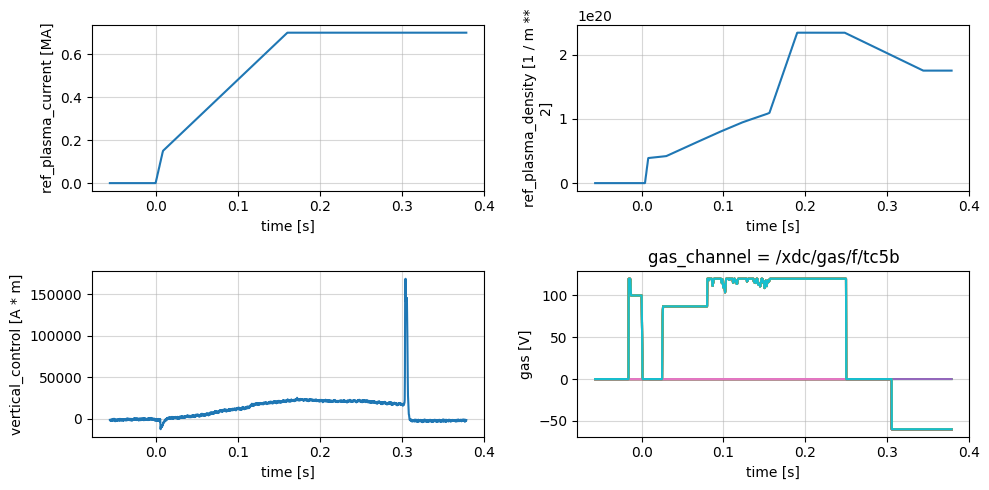

In [35]:
profiles = xr.open_zarr(store, group='control')

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()
profiles['ref_plasma_current'].plot(x='time', ax=axes[0])
profiles['ref_plasma_density'].plot(x='time', ax=axes[1])
profiles['vertical_control'].plot(x='time', ax=axes[2])

for i in range(len(profiles.gas_channel)):
    profiles['gas'].isel(gas_channel=i).plot(x='time', ax=axes[3])

for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()

profiles

### 1D Profiles

<xarray.Dataset> Size: 125kB
Dimensions:                      (time: 1743)
Coordinates:
  * time                         (time) float64 14kB -0.0568 -0.05655 ... 0.3787
Data variables:
    gas_outboard_total           (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    integrated_electron_density  (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    gas_pressure                 (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    sol_current                  (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    neutron_flux                 (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    gas_inboard_total            (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    line_averaged_density        (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>
    plasma_current               (time) float64 14kB dask.array<chunksize=(1743,), meta=np.ndarray>

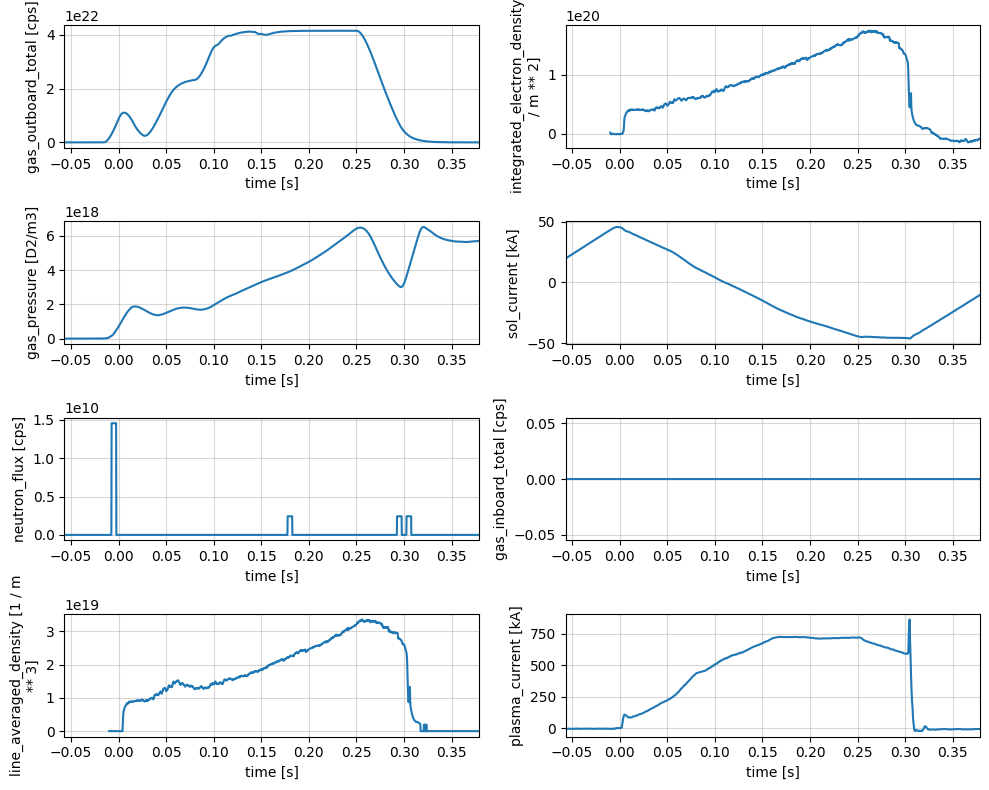

In [42]:
profiles = xr.open_zarr(store, group='summary')

plot_1d_profiles(profiles)
profiles

### Flux Loops

<xarray.Dataset> Size: 853kB
Dimensions:                 (coil_currents_channel: 6, time: 3128,
                             flux_loops_channel: 6, saddle_coils_channel: 4,
                             center_column_channel: 5,
                             outer_discrete_channel: 8, coil_voltages_channel: 4)
Coordinates:
  * flux_loops_channel      (flux_loops_channel) <U12 288B 'AMB_FL/CC03' ... ...
  * saddle_coils_channel    (saddle_coils_channel) <U15 240B 'XMB_SAD/OUT/M01...
  * coil_currents_channel   (coil_currents_channel) <U20 480B 'AMC_P3L COIL C...
  * center_column_channel   (center_column_channel) <U10 200B 'XMA_CCBV04' .....
  * coil_voltages_channel   (coil_voltages_channel) <U12 192B '/xdc/pf/f/p1' ...
  * outer_discrete_channel  (outer_discrete_channel) <U9 288B 'XMA_OBR03' ......
  * time                    (time) float64 25kB -0.0638 -0.06355 ... 0.7179
Data variables:
    coil_currents           (coil_currents_channel, time) float64 150kB dask.array<chunksize=(6, 3128), meta=np.ndarray>
    saddle_coils            (saddle_coils_channel, time) float64 100kB dask.array<chunksize=(4, 3128), meta=np.ndarray>
    outer_discrete          (outer_discrete_channel, time) float64 200kB dask.array<chunksize=(8, 3128), meta=np.ndarray>
    center_column           (center_column_channel, time) float64 125kB dask.array<chunksize=(5, 3128), meta=np.ndarray>
    coil_voltages           (coil_voltages_channel, time) float64 100kB dask.array<chunksize=(4, 3128), meta=np.ndarray>
    flux_loops              (flux_loops_channel, time) float64 150kB dask.array<chunksize=(6, 3128), meta=np.ndarray>

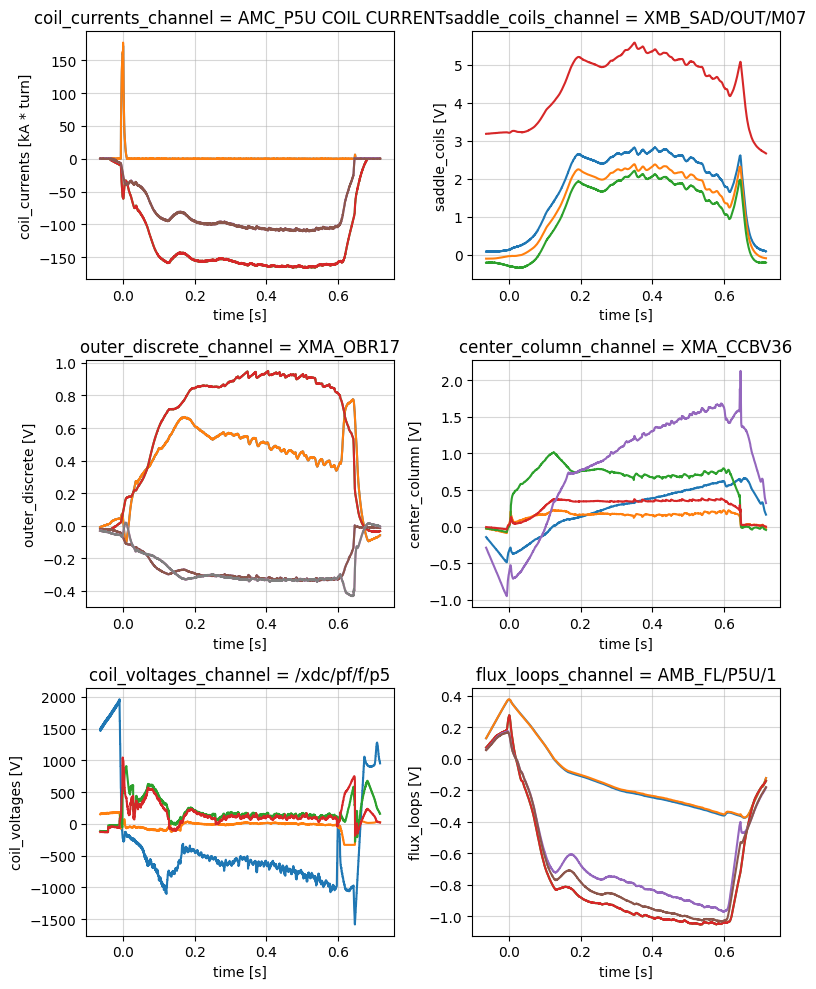

In [7]:
profiles = xr.open_zarr(store, group='magnetics')

fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

for i, name in enumerate(profiles.data_vars.keys()):
    signal = profiles[name]
    for channel in range(signal.shape[0]):
        s = signal.isel({signal.dims[0]: channel})
        s.plot(x='time', ax=axes[i])

for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()

profiles

### D-alpha

<xarray.Dataset> Size: 1MB
Dimensions:                  (time: 39090)
Coordinates:
  * time                     (time) float64 313kB -0.0638 -0.06378 ... 0.718
Data variables:
    dalpha_tangential        (time) float64 313kB dask.array<chunksize=(19545,), meta=np.ndarray>
    dalpha_mid_plane_wide    (time) float64 313kB dask.array<chunksize=(19545,), meta=np.ndarray>
    dalpha_mid_plane_center  (time) float64 313kB dask.array<chunksize=(19545,), meta=np.ndarray>

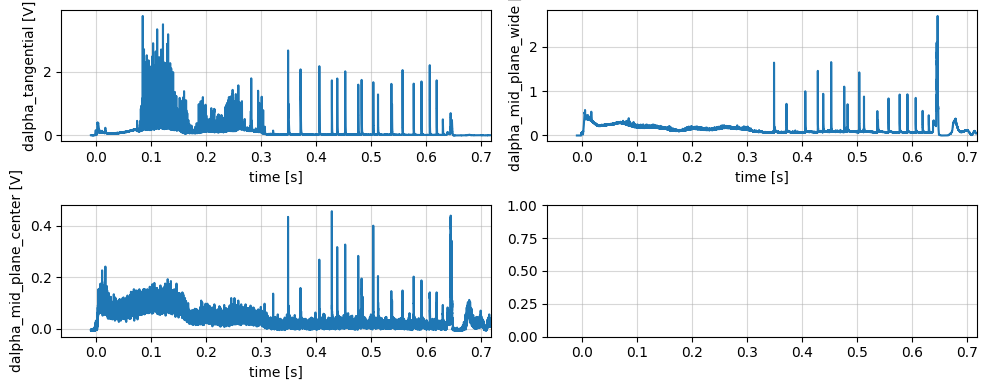

In [8]:
profiles = xr.open_zarr(store, group='dalpha')
plot_1d_profiles(profiles)
profiles

### Soft X-rays

<xarray.Dataset> Size: 172MB
Dimensions:         (tcam_channel: 18, hcam_l_channel: 18, hcam_u_channel: 18,
                     time: 390900)
Coordinates:
  * tcam_channel    (tcam_channel) <U11 792B 'XSX_TCAM#1' ... 'XSX_TCAM#9'
  * hcam_l_channel  (hcam_l_channel) <U12 864B 'XSX_HCAML#1' ... 'XSX_HCAML#9'
  * hcam_u_channel  (hcam_u_channel) <U12 864B 'XSX_HCAMU#1' ... 'XSX_HCAMU#9'
  * time            (time) float64 3MB -0.0638 -0.0638 -0.0638 ... 0.718 0.718
Data variables:
    tcam            (tcam_channel, time) float64 56MB dask.array<chunksize=(3, 48863), meta=np.ndarray>
    hcam_u          (hcam_u_channel, time) float64 56MB dask.array<chunksize=(3, 48863), meta=np.ndarray>
    hcam_l          (hcam_l_channel, time) float64 56MB dask.array<chunksize=(3, 48863), meta=np.ndarray>

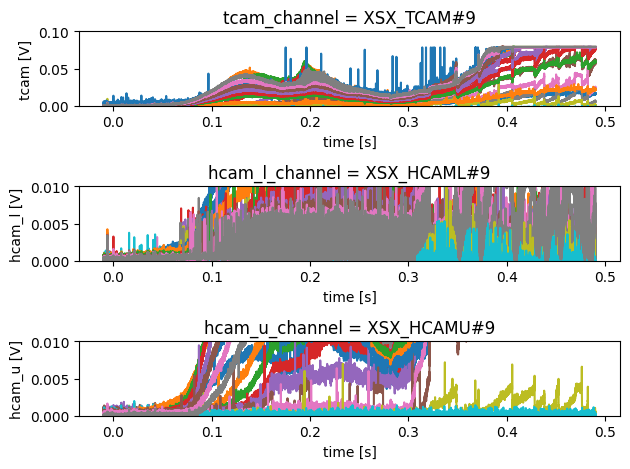

In [9]:
profiles = xr.open_zarr(store, group='soft_x_rays')
fig, axes = plt.subplots(3, 1)

for i in range(len(profiles.tcam_channel)):
    profiles['tcam'].isel(tcam_channel=i).plot(x='time', ax=axes[0])
    axes[0].set_ylim(0, 0.1)

for i in range(len(profiles.hcam_l_channel)):
    profiles['hcam_l'].isel(hcam_l_channel=i).plot(x='time', ax=axes[1])
    axes[1].set_ylim(0, 0.01)

for i in range(len(profiles.hcam_u_channel)):
    profiles['hcam_u'].isel(hcam_u_channel=i).plot(x='time', ax=axes[2])
    axes[2].set_ylim(0, 0.01)

plt.tight_layout()
profiles

### Thomson Profiles

<xarray.Dataset> Size: 457kB
Dimensions:       (major_radius: 120, time: 157)
Coordinates:
  * major_radius  (major_radius) float64 960B 0.3 0.31 0.32 ... 1.47 1.48 1.49
  * time          (time) float64 1kB -0.0638 -0.0588 -0.0538 ... 0.7112 0.7162
Data variables:
    ne            (time, major_radius) float64 151kB dask.array<chunksize=(157, 120), meta=np.ndarray>
    ne_core       (time) float64 1kB dask.array<chunksize=(157,), meta=np.ndarray>
    te_core       (time) float64 1kB dask.array<chunksize=(157,), meta=np.ndarray>
    pe            (time, major_radius) float64 151kB dask.array<chunksize=(157, 120), meta=np.ndarray>
    te            (time, major_radius) float64 151kB dask.array<chunksize=(157, 120), meta=np.ndarray>

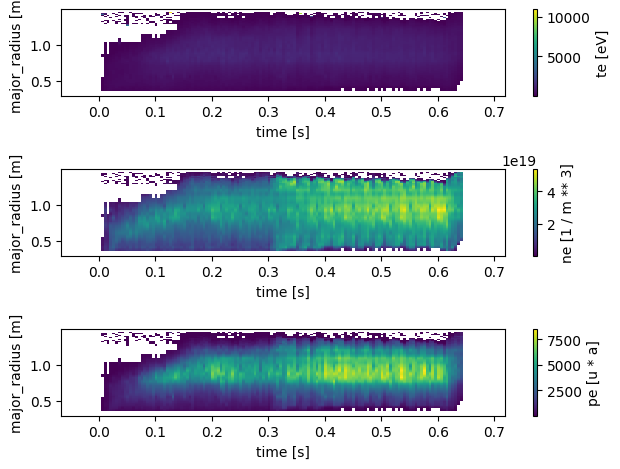

In [10]:
profiles = xr.open_zarr(store, group='thomson_scattering')
profiles

fig, axes = plt.subplots(3, 1)
axes = axes.flatten()
profiles.te.plot(x='time', y='major_radius', ax=axes[0])
profiles.ne.plot(x='time', y='major_radius', ax=axes[1])
profiles.pe.plot(x='time', y='major_radius', ax=axes[2])
plt.tight_layout()

profiles

<xarray.Dataset> Size: 457kB
Dimensions:       (major_radius: 120, time: 157)
Coordinates:
  * major_radius  (major_radius) float64 960B 0.3 0.31 0.32 ... 1.47 1.48 1.49
  * time          (time) float64 1kB -0.0638 -0.0588 -0.0538 ... 0.7112 0.7162
Data variables:
    ne            (time, major_radius) float64 151kB dask.array<chunksize=(157, 120), meta=np.ndarray>
    ne_core       (time) float64 1kB dask.array<chunksize=(157,), meta=np.ndarray>
    te_core       (time) float64 1kB dask.array<chunksize=(157,), meta=np.ndarray>
    pe            (time, major_radius) float64 151kB dask.array<chunksize=(157, 120), meta=np.ndarray>
    te            (time, major_radius) float64 151kB dask.array<chunksize=(157, 120), meta=np.ndarray>

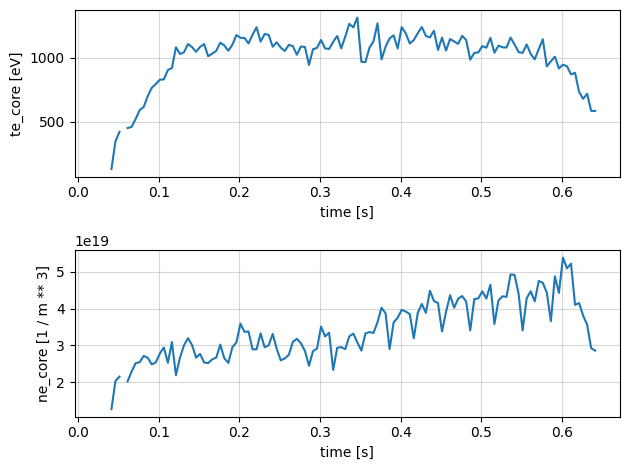

In [11]:
fig, axes = plt.subplots(2, 1)
profiles['te_core'].plot(x='time', ax=axes[0])
profiles['ne_core'].plot(x='time', ax=axes[1])
for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()
profiles

### CXRS Profiles

<xarray.Dataset> Size: 204kB
Dimensions:       (major_radius: 160, time: 79)
Coordinates:
  * major_radius  (major_radius) float64 1kB 0.0 0.01 0.02 ... 1.57 1.58 1.59
  * time          (time) float64 632B -0.0638 -0.0538 -0.0438 ... 0.7062 0.7162
Data variables:
    vi            (time, major_radius) float64 101kB dask.array<chunksize=(79, 160), meta=np.ndarray>
    ti            (time, major_radius) float64 101kB dask.array<chunksize=(79, 160), meta=np.ndarray>

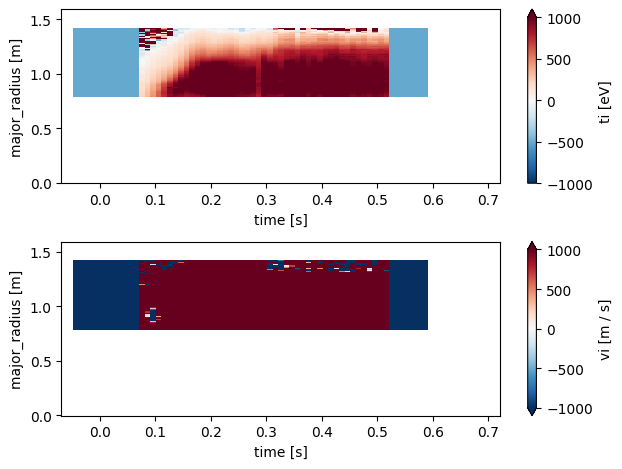

In [12]:
profiles = xr.open_zarr(store, group='charge_exchange')

fig, axes = plt.subplots(2, 1)
profiles['ti'].plot(x='time', y='major_radius', ax=axes[0], vmax=1000)
profiles['vi'].plot(x='time', y='major_radius', ax=axes[1], vmax=1000)
plt.tight_layout()
profiles

### Equilibrium

<xarray.Dataset> Size: 6MB
Dimensions:              (z: 65, time: 88, n_x_points: 4, profile_r: 65,
                          n_boundary_coords: 147, major_radius: 65)
Coordinates:
  * z                    (z) float32 260B -2.0 -1.938 -1.875 ... 1.875 1.938 2.0
  * n_x_points           (n_x_points) <U16 256B 'EFM_XPOINT1_R(C)' ... 'EFM_X...
  * profile_r            (profile_r) float32 260B 0.0 0.01562 ... 0.9844 1.0
  * major_radius         (major_radius) float64 520B 0.06 0.09 ... 1.95 1.98
  * time                 (time) float64 704B -0.0568 -0.0518 ... 0.3732 0.3782
  * n_boundary_coords    (n_boundary_coords) float32 588B 0.0 1.0 ... 146.0
Data variables: (12/35)
    ip_rating            (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    beta_normal          (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    bvac_rmag            (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    elongation_axis      (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    rpsi90_in            (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    magnetic_axis_z      (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    ...                   ...
    q100                 (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    lcfs_z               (time, n_boundary_coords) float64 103kB dask.array<chunksize=(88, 147), meta=np.ndarray>
    rpsi95_in            (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    triangularity_upper  (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    minor_radius         (time) float64 704B dask.array<chunksize=(88,), meta=np.ndarray>
    plasma_current       (time, z, major_radius) float64 3MB dask.array<chunksize=(44, 33, 33), meta=np.ndarray>

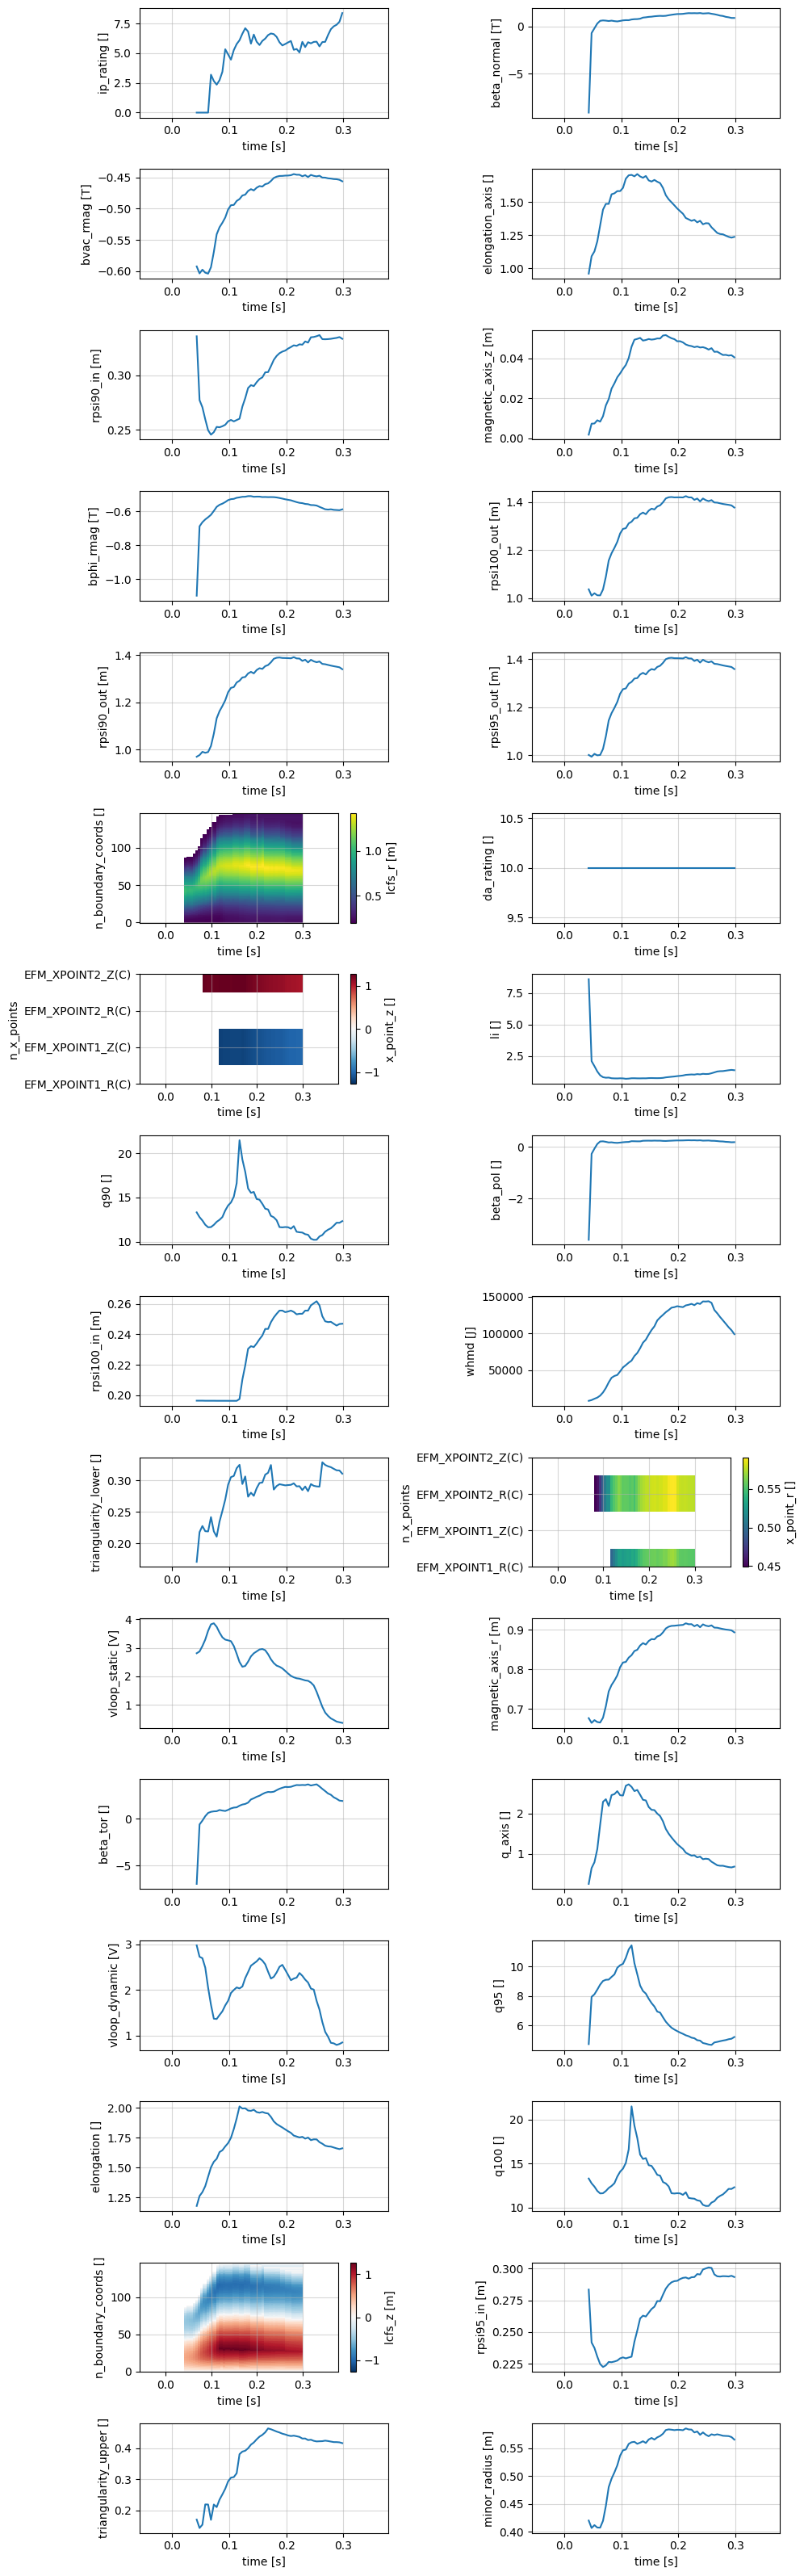

In [40]:
profiles = xr.open_zarr(store, group='equilibrium')

profile_1d = profiles.drop_vars(['magnetic_flux', 'plasma_current', 'q'])
plot_1d_profiles(profile_1d)

profiles

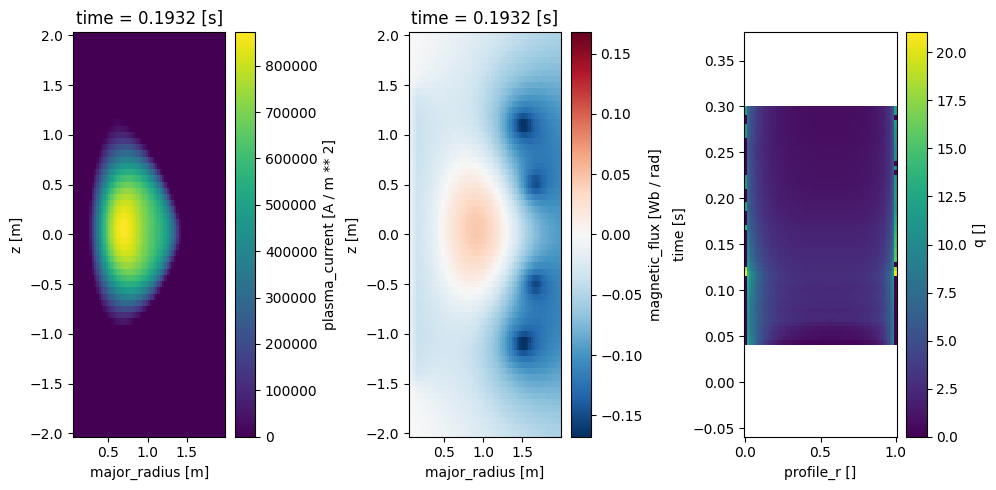

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

profiles['plasma_current'].isel(time=50).plot(ax=axes[0])
profiles['magnetic_flux'].isel(time=50).plot(ax=axes[1])
profiles['q'].plot(ax=axes[2])
plt.tight_layout()

### Mirnov Coils

<xarray.Dataset> Size: 13MB
Dimensions:  (time: 390900)
Coordinates:
  * time     (time) float64 3MB -0.0638 -0.0638 -0.0638 ... 0.718 0.718 0.718
Data variables:
    omv_210  (time) float64 3MB dask.array<chunksize=(48863,), meta=np.ndarray>
    omv_310  (time) float64 3MB dask.array<chunksize=(48863,), meta=np.ndarray>
    omv_110  (time) float64 3MB dask.array<chunksize=(48863,), meta=np.ndarray>

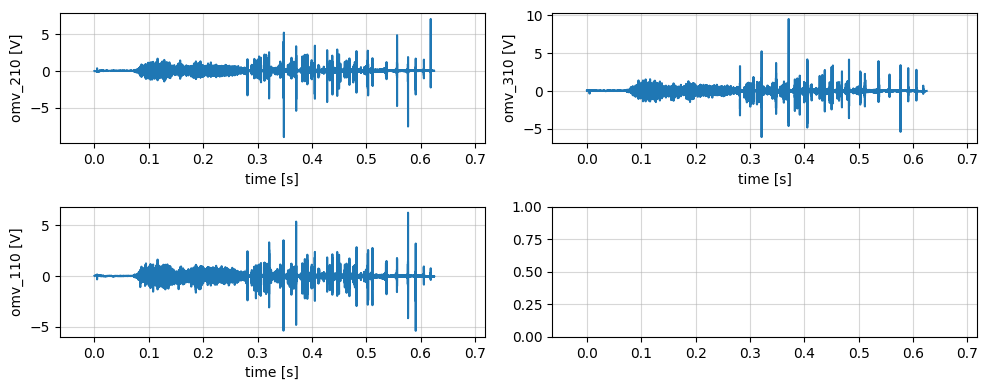

In [15]:
profiles = xr.open_zarr(store, group='mirnov')

plot_1d_profiles(profiles)
profiles

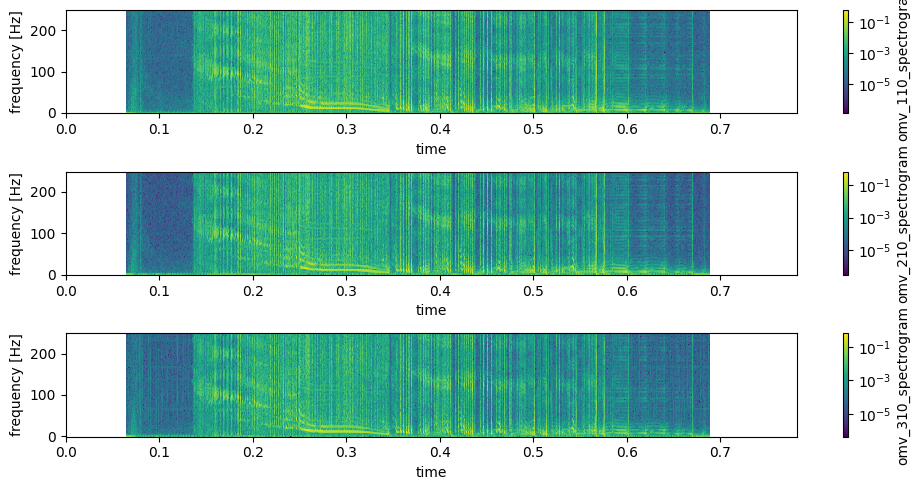

In [16]:
profiles = xr.open_zarr(store, group='mirnov_fft')

fig, axes = plt.subplots(3, 1, figsize=(10, 5))
profiles['omv_110_spectrogram'].plot(norm=colors.LogNorm(), ax=axes[0])
profiles['omv_210_spectrogram'].plot(norm=colors.LogNorm(), ax=axes[1])
profiles['omv_310_spectrogram'].plot(norm=colors.LogNorm(), ax=axes[2])
plt.tight_layout()